# `RETAIL CASE STUDY`

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

In [2]:
trans = pd.read_csv('/Users/adityabisht/Downloads/Python_DA/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv')
prod = pd.read_csv('/Users/adityabisht/Downloads/Python_DA/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv')
customer = pd.read_csv('/Users/adityabisht/Downloads/Python_DA/Python Foundation Case Study 1 - Retail Case Study/Customer.csv')

In [3]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [5]:
prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [6]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [7]:
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [9]:
customer_final = pd.merge(left = pd.merge(left=trans,right=customer,left_on='cust_id',right_on='customer_Id'),
                         right=prod,left_on = 'prod_cat_code',right_on='prod_cat_code')

In [10]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women


### 2. Prepare a summary report for the merged data set.

#### a. Get the column names and their corresponding data types

In [11]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [12]:
customer_final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [13]:
## converting the tran_date and DOB from dtype object to dtype datetime.

customer_final.tran_date = pd.to_datetime(customer_final.tran_date)

customer_final.DOB = pd.to_datetime(customer_final.DOB)



<ipython-input-13-6a58267a942d>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final.tran_date = pd.to_datetime(customer_final.tran_date)
<ipython-input-13-6a58267a942d>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final.DOB = pd.to_datetime(customer_final.DOB)


In [14]:
customer_final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

#### b. Top/Bottom 10 observations

In [15]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,3,Kids
3,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens
4,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
5,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,3,Kids
6,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,4,Mens
7,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,1,Women
8,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,3,Kids
9,63126920365,271489,2011-05-22,4,1,4,131,55.020,579.020,TeleShop,271489,1971-04-21,M,9.0,Clothing,4,Mens


In [16]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
99283,34958490122,266849,2011-02-20,12,6,4,1155,485.10,5105.10,e-Shop,266849,1979-12-10,M,1.0,Home and kitchen,11,Bath
99284,34958490122,266849,2011-02-20,12,6,4,1155,485.10,5105.10,e-Shop,266849,1979-12-10,M,1.0,Home and kitchen,12,Tools
99285,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,2,Furnishing
99286,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,10,Kitchen
99287,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,11,Bath
99288,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,12,Tools
99289,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,2,Furnishing
99290,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,10,Kitchen
99291,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,11,Bath
99292,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,12,Tools


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [17]:
customer_final.describe().T.loc[:,'min':]

,min,25%,50%,75%,max
transaction_id,3268991.000,2.492150e+10,5.011083e+10,7.528121e+10,9.998755e+10
cust_id,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
prod_subcat_code,1.000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.130000e+02,7.130000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.999200e+02,3.669750e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.761370e+03,3.585725e+03,8.287500e+03
customer_Id,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


#### d. Frequency tables for all the categorical variables

In [18]:
customer_final.select_dtypes('O').value_counts()

Store_type      Gender  prod_cat  prod_subcat
e-Shop          M       Books     Non-Fiction    1259
                                  Fiction        1259
                                  DIY            1259
                                  Comics         1259
                                  Children       1259
                                                 ... 
Flagship store  F       Bags      Mens            200
MBR             F       Bags      Women           198
                                  Mens            198
Flagship store  M       Bags      Women           189
                                  Mens            189
Length: 184, dtype: int64

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

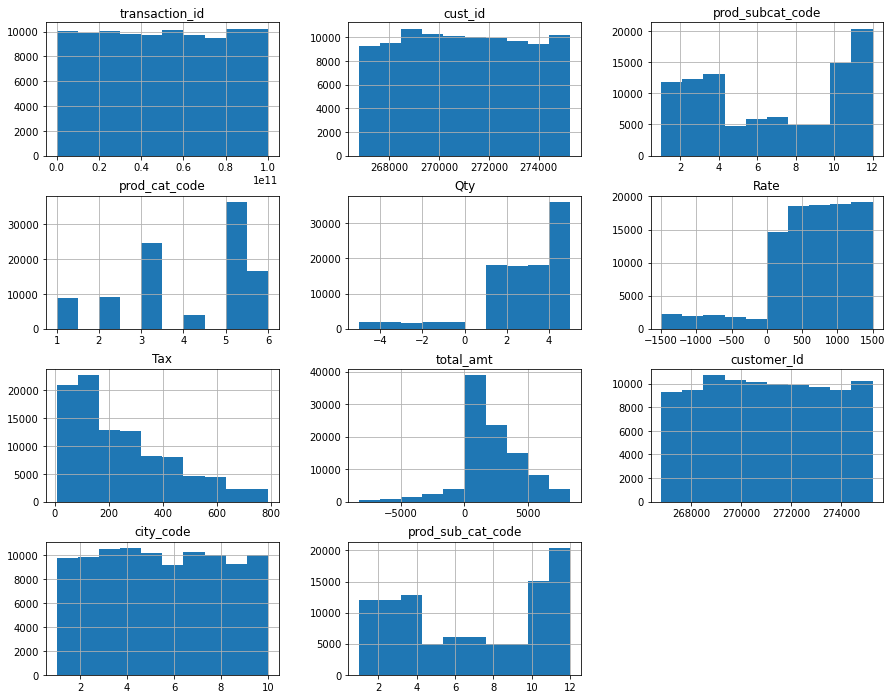

In [19]:
customer_final.select_dtypes('number').hist(figsize=(15,12))
plt.show()

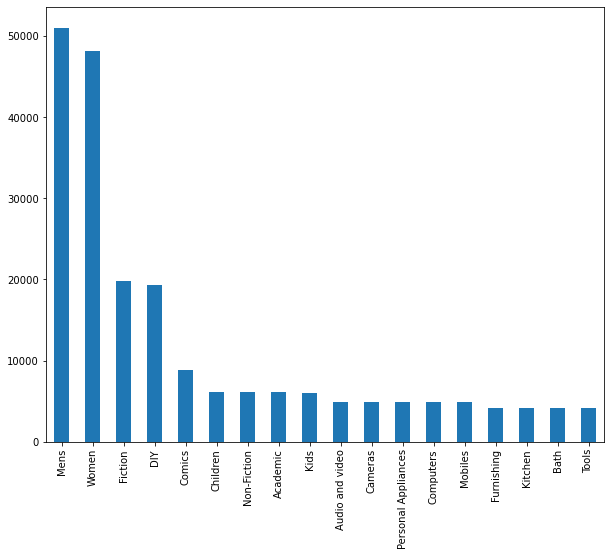

In [20]:
plt.figure(figsize=(10,8))
for columns in customer_final.select_dtypes('O').columns:
     customer_final[columns].value_counts().plot(kind = 'bar')
        
        
    

### 4. Calculate the following information using the merged dataset :

    

#### a. Time period of the available transaction data

In [21]:
start_date = customer_final.tran_date.min()
end_date = customer_final.tran_date.max()
print(f"The time period of the available transaction data is from {start_date} to {end_date}.")

The time period of the available transaction data is from 2011-01-02 00:00:00 to 2014-12-02 00:00:00.


#### b. Count of transactions where the total amount of transaction was negative

In [22]:
customer_final.transaction_id[customer_final.total_amt < 0].count()

9294

### 5. Analyze which product categories are more popular among females vs male customers.

In [23]:
prod_cat_gender = customer_final.pivot_table(index='prod_cat' , columns='Gender',values = 'transaction_id',aggfunc='count')

In [24]:
prod_cat_gender['diff'] = prod_cat_gender.M - prod_cat_gender.F

In [25]:

print('positive diff shows more male buyers whereas negative diff reflects more female buyers ')
prod_cat_gender

positive diff shows more male buyers whereas negative diff reflects more female buyers 


Gender,F,M,diff
prod_cat,,,
Bags,1988,2008,20
Books,17694,18696,1002
Clothing,4317,4554,237
Electronics,11640,12850,1210
Footwear,4587,4407,-180
Home and kitchen,7976,8536,560


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [26]:
city_cust_count = customer_final.groupby('city_code').agg({'cust_id':'count'})

In [27]:
city_cust_count['%age'] = (city_cust_count.cust_id / city_cust_count.cust_id.sum())*100

In [28]:
city_cust_count.sort_values(by='cust_id',ascending=False)

,cust_id,%age
city_code,,
4.0,10571,10.650130
3.0,10467,10.545352
7.0,10258,10.334787
5.0,10116,10.191725
10.0,9976,10.050677
8.0,9965,10.039594
2.0,9843,9.916681
1.0,9717,9.789738
9.0,9214,9.282972


In [29]:
# city with max cust 
city_cust_count.sort_values(by='cust_id',ascending=False).head(1)

,cust_id,%age
city_code,,
4.0,10571,10.65013


### 7. Which store type sells the maximum products by value and by quantity?

In [36]:
customer_final.pivot_table(index = 'Store_type',values = ['Qty','total_amt'],aggfunc='sum').sort_values(by=['total_amt','Qty'],ascending=False)

,Qty,total_amt
Store_type,,
e-Shop,98447,8.591575e+07
Flagship store,48007,4.188397e+07
MBR,48285,4.170033e+07
TeleShop,47339,4.046656e+07


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [47]:
flagship = customer_final[customer_final.Store_type == 'Flagship store']

In [48]:
flagship

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
6,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,4,Mens
7,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,1,Women
8,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,3,Kids
21,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,4,Mens
22,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99272,40760855337,268517,2011-03-31,10,6,5,503,264.075,2779.075,Flagship store,268517,1976-12-27,F,4.0,Home and kitchen,12,Tools
99289,20417144530,269556,2011-01-29,10,6,3,654,206.010,2168.010,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,2,Furnishing
99290,20417144530,269556,2011-01-29,10,6,3,654,206.010,2168.010,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,10,Kitchen
99291,20417144530,269556,2011-01-29,10,6,3,654,206.010,2168.010,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,11,Bath


In [51]:
total_amt_by_EC = flagship.pivot_table(index='prod_cat',values='total_amt',aggfunc='sum').loc[['Clothing','Electronics']]

In [52]:
total_amt_by_EC

,total_amt
prod_cat,
Clothing,3583269.69
Electronics,11075680.20


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [60]:
male_cust = customer_final[customer_final.Gender == 'M']
male_cust.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,3,Kids
3,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens
4,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women


In [59]:
male_cust.groupby('prod_cat').agg({'total_amt':'sum'}).loc['Electronics']

total_amt    2.851555e+07
Name: Electronics, dtype: float64

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [64]:
trans_pos = customer_final[customer_final.total_amt > 0] 
trans_pos.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
3,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens
4,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
5,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,3,Kids
6,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,4,Mens
7,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,1,Women


In [66]:
trans_count = trans_pos.groupby('cust_id')['transaction_id'].count()

In [71]:
trans_count[trans_count > 10].count()

4019

### 11. For all customers aged between 25 - 35, find out:

In [99]:


customer_final['age'] = ((dt.datetime.now() - customer_final['DOB']).dt.days) // 365
age25_35 = customer_final[customer_final.age.between(25,35,inclusive=True)]
age25_35

<ipython-input-99-a8a3dc70a2d9>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  age25_35 = customer_final[customer_final.age.between(25,35,inclusive=True)]


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
42,31995208412,268509,2013-01-08,4,1,5,938,492.45,5182.45,TeleShop,268509,1989-08-17,M,10.0,Clothing,4,Mens,34
43,31995208412,268509,2013-01-08,4,1,5,938,492.45,5182.45,TeleShop,268509,1989-08-17,M,10.0,Clothing,1,Women,34
44,31995208412,268509,2013-01-08,4,1,5,938,492.45,5182.45,TeleShop,268509,1989-08-17,M,10.0,Clothing,3,Kids,34
45,43469248603,268444,2012-06-01,4,1,2,403,84.63,890.63,MBR,268444,1992-02-01,F,6.0,Clothing,4,Mens,31
46,43469248603,268444,2012-06-01,4,1,2,403,84.63,890.63,MBR,268444,1992-02-01,F,6.0,Clothing,1,Women,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99276,96622725554,267539,2011-03-21,11,6,5,1360,714.00,7514.00,e-Shop,267539,1989-01-25,F,6.0,Home and kitchen,12,Tools,35
99285,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,2,Furnishing,33
99286,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,10,Kitchen,33
99287,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,11,Bath,33


#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [103]:
age25_35.pivot_table(index='prod_cat',values = 'total_amt',aggfunc='sum').loc[['Books','Electronics']]

,total_amt
prod_cat,
Books,1.589139e+07
Electronics,1.126092e+07


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [111]:
customer_final.total_amt[(customer_final.tran_date > '1st Jan, 2014') & (customer_final.tran_date < '1st Mar, 2014')].sum()

5591225.965